# Worksheet 02

Name:  Dayu Li
UID: U61453443

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

Starting with high-level design and breaking it down can make it challenging to handle intricate implementation details and maintain code, potentially leading to maintenance issues and reduced flexibility.

b) What is a drawback of the bottom up approach?

It can result in a lack of a cohesive overall design or architecture. Starting with small, individual components or functions and gradually building upwards can make it difficult to ensure that all the components work together seamlessly and efficiently. 

c) What are 3 things you can do to have a better debugging experience?

1. Don’t panic while debugging. 
2. Read the error and analyze the error.
3. Re-read your code and be patient.

d) (Optional) Follow along with the live coding. You can write your code here:

Total solutions found: 92


## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [37]:
import pandas as pd

df = pd.read_csv('train.csv') # your code here
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [38]:
print("there are " +  str(df[df.isnull().any(axis=1)].shape[0]) + " rows with at least one empty value")

there are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [39]:
df = df.dropna(axis=1, thresh=len(df) - 200 + 1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [42]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [44]:
df[['Last Name', 'Title', 'First Name', 'Middle Name']] = df['Name'].str.extract(r'(?P<Last_Name>[^,]+),\s(?P<Title>\w+)\.\s(?P<First_Name>\w+)\s?(?P<Middle_Name>\w+)?')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


f) Complete the code below to replace all missing ages with the average age

In [46]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,Allen,Mr,William,Henry
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,Q,Moran,Mr,James,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,S,McCarthy,Mr,Timothy,J
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,S,Palsson,Master,Gosta,Leonard
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,S,Johnson,Mrs,Oscar,W
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,C,Nasser,Mrs,Nicholas,NaN


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

Text(0.5, 1.0, 'Average Age of Survived vs. Not Survived')

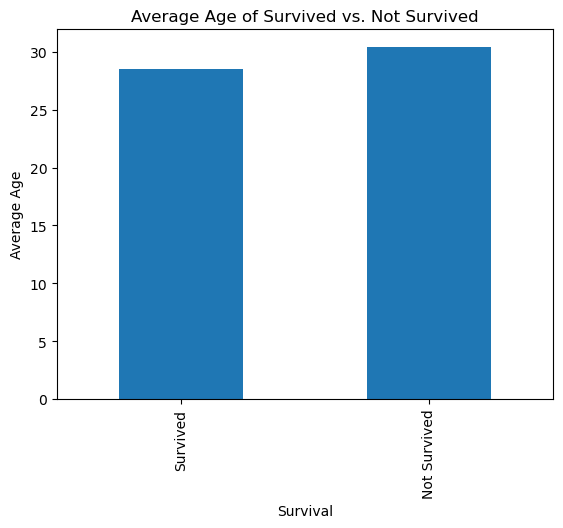

In [51]:
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

average_age_survived = survived['Age'].mean()
average_age_not_survived = not_survived['Age'].mean()


average_age_data = pd.DataFrame({'Survival': ['Survived', 'Not Survived'],
                                 'Average Age': [average_age_survived, average_age_not_survived]})

ax = average_age_data.plot(kind='bar', x='Survival', y='Average Age', legend=False)
ax.set_xlabel('Survival')
ax.set_ylabel('Average Age')
ax.set_title('Average Age of Survived vs. Not Survived')

In [ ]:
The survived average age is lower than the not survived average age, indicating younger passengers had a higher survival rate. 